# Predicting Soccer Match Winners: A Data-Driven Approach

In this project, the dataset was generated using the `WebScraping.ipynb` notebook and includes statistics from competitions such as the FA Community Shield, Premier League, Champions League, EFL Cup, Conference League, Europa League, Super Cup, and FA Cup. Data was scraped from [Sports Reference Premier-League-Stats](https://https://fbref.com/en/comps/9/Premier-League-Stats), combining the "Scores & Fixtures" and "Shooting" tables for each team over the 2020-2024 seasons.

**GLOSSARY**:

- **Date** -- Date listed is local to the match

- **Time** -- Time listed is local to the match venue<br>Time is written in the 24-hour notation<br>Your local time is in (·)

- **Comp** -- Competition<br>Number next to competition states which level in the country's league pyramid this league occupies.<br>Round -- Round or Phase of Competition

- **Round** -- Round or Phase of Competition

- **Day** -- Day of week

- **GF** -- Goals For

- **GA** -- Goals Against

- **Opponent** - Name of the away team

- **xG** -- Expected Goals<br>xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).<br>Provided by Opta.<br>An underline indicates there is a match that is missing data, but will be updated when available.

- **xGA** -- xG Allowed<br>Expected Goals Allowed<br>xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).<br>Provided by Opta.<br>An underline indicates there is a match that is missing data, but will be updated when available.

- **Poss** -- Possession<br>Calculated as the percentage of passes attempted

- **Attendance**

- **Captain** -- Name of the captain of the home team

- **Formation** -- Number of players in each row from defenders to forwards, not including the goalkeeper.<br>Formations provided by Data Sports Group and Opta.

- **Opp Formation** -- Opponent Formation<br>Number of players in each row from defenders to forwards, not including the goalkeeper.<br>Formations provided by Data Sports Group and Opta.

- **Referee** -- Name of the match official

- **Match report**

- **Notes**

- **Sh** -- Shots Total<br>Does not include penalty kicks

- **SoT** -- Shots on Target<br>Note: Shots on target do not include penalty kicks

- **SoT%** -- Shots on Target %<br>Percentage of shots that are on target <br>Minimum .395 shots per squad game to qualify as a leader<br>Note: Shots on target do not include penalty kicks

- **G/Sh** -- Goals/Shot<br>Minimum .395 shots per squad game to qualify as a leader

- **G/SoT** -- Goals/Shot on Target<br>Minimum .111 shots on target per squad game to qualify as a leader<br>Note: Shots on target do not include penalty kicks

- **Dist** -- Average Shot Distance<br>Average distance, in yards, from goal of all shots taken<br>Minimum .395 shots per squad game to qualify as a leader<br>Does not include penalty kicks

- **FK** -- Shots from Free Kicks

- **PK** -- Penalty Kicks Made

- **PKatt** -- Penalty Kicks Attempted

- **npxG** -- npxG: Non-Penalty xG<br>Non-Penalty Expected Goals<br>Provided by Opta.<br>An underline indicates there is a match that is missing data, but will be updated when available.

- **npxG/Sh** -- npxG/Shot<br>Non-Penalty Expected Goals per shot<br>Provided by Opta.<br>An underline indicates there is a match that is missing data, but will be updated when available.<br>Minimum .395 shots per squad game to qualify as a leader

- **G-xG** -- Goals - xG<br>Goals minus Expected Goals<br>xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).<br>Provided by Opta.<br>An underline indicates there is a match that is missing data, but will be updated when available.

- **np:G-xG** -- Non-Penalty Goals - npxG<br>Non-Penalty Goals minus Non-Penalty Expected Goals<br>xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).<br>Provided by Opta.<br>An underline indicates there is a match that is missing data, but will be updated when available.

- **Team** -- Name of the home team

- **Season**

# Data Cleaning

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Premier_League_matches_2024-2020.csv")

df.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Sh,SoT,SoT%,G/Sh,G/SoT,Dist,FK,PK,PKatt,npxG,npxG/Sh,G-xG,np:G-xG,team,season
0,2024-08-10,15:00,FA Community Shield,FA Community Shield,Sat,Home,D,1 (7),1 (6),Manchester Utd,NaN,NaN,56.0,78146.0,Rúben Dias,4-3-3,4-2-3-1,Jarred Gillett,Match Report,Manchester City won on penalty kicks following...,9.0,1.0,11.1,0.11,1.00,NaN,NaN,0,0,NaN,NaN,NaN,NaN,Manchester City,2024
1,2024-08-18,16:30,Premier League,Matchweek 1,Sun,Away,W,2,0,Chelsea,0.8,1.0,52.0,39818.0,Kevin De Bruyne,3-2-4-1,4-2-3-1,Anthony Taylor,Match Report,NaN,11.0,5.0,45.5,0.18,0.40,19.1,0.0,0,0,0.8,0.07,1.2,1.2,Manchester City,2024
2,2024-08-24,15:00,Premier League,Matchweek 2,Sat,Home,W,4,1,Ipswich Town,3.3,0.3,75.0,53147.0,Kevin De Bruyne,3-2-4-1,5-4-1,Samuel Allison,Match Report,NaN,13.0,4.0,30.8,0.23,0.75,17.8,1.0,1,1,2.6,0.20,0.7,0.4,Manchester City,2024
3,2024-08-31,17:30,Premier League,Matchweek 3,Sat,Away,W,3,1,West Ham,3.0,0.7,67.0,62469.0,Kevin De Bruyne,3-2-4-1,4-2-3-1,Michael Oliver,Match Report,NaN,23.0,8.0,34.8,0.13,0.38,15.0,1.0,0,0,3.0,0.13,0.0,0.0,Manchester City,2024
4,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,W,2,1,Brentford,2.1,1.0,54.0,52148.0,Kyle Walker,4-2-3-1,5-3-2,Darren Bond,Match Report,NaN,18.0,7.0,38.9,0.11,0.29,17.2,0.0,0,0,2.1,0.12,-0.1,-0.1,Manchester City,2024


In [ ]:
# Rename columns in lower case
df.columns = df.columns.str.lower()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4051 entries, 0 to 4050
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4051 non-null   object 
 1   time           4051 non-null   object 
 2   comp           4051 non-null   object 
 3   round          4051 non-null   object 
 4   day            4051 non-null   object 
 5   venue          4051 non-null   object 
 6   result         4051 non-null   object 
 7   gf             4051 non-null   object 
 8   ga             4051 non-null   object 
 9   opponent       4051 non-null   object 
 10  xg             3541 non-null   float64
 11  xga            3541 non-null   float64
 12  poss           4039 non-null   float64
 13  attendance     3151 non-null   float64
 14  captain        4051 non-null   object 
 15  formation      4051 non-null   object 
 16  opp formation  4051 non-null   object 
 17  referee        4041 non-null   object 
 18  match re

# Data Preprocessing

In [ ]:
# Transform 'date' in datetime format
df['date'] = pd.to_datetime(df['date'])
# Sort dataset
df = df.sort_values(['season', 'team', 'date']).reset_index(drop=True)

df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,opp formation,referee,match report,notes,sh,sot,sot%,g/sh,g/sot,dist,fk,pk,pkatt,npxg,npxg/sh,g-xg,np:g-xg,team,season
0,2020-08-29,16:30,Community Shield,FA Community Shield,Sat,Neutral,D,1 (5),1 (4),Liverpool,NaN,NaN,40.0,NaN,Pierre-Emerick Aubameyang,3-4-3,4-3-3,Andre Marriner,Match Report,NaN,8.0,2.0,25.0,0.13,0.50,NaN,NaN,0,0,NaN,NaN,NaN,NaN,Arsenal,2020
1,2020-09-12,12:30,Premier League,Matchweek 1,Sat,Away,W,3,0,Fulham,1.9,0.1,54.0,NaN,Pierre-Emerick Aubameyang,3-4-3,4-2-3-1,Chris Kavanagh,Match Report,NaN,13.0,5.0,38.5,0.23,0.60,14.1,2.0,0,0,1.9,0.20,1.1,1.1,Arsenal,2020
2,2020-09-19,20:00,Premier League,Matchweek 2,Sat,Home,W,2,1,West Ham,1.1,2.0,62.0,NaN,Pierre-Emerick Aubameyang,3-4-3,5-4-1,Michael Oliver,Match Report,NaN,7.0,3.0,42.9,0.29,0.67,14.8,0.0,0,0,1.1,0.16,0.9,0.9,Arsenal,2020
3,2020-09-23,19:45,EFL Cup,Third round,Wed,Away,W,2,0,Leicester City,NaN,NaN,51.0,NaN,David Luiz,3-4-3,4-2-3-1,Peter Bankes,Match Report,NaN,10.0,4.0,40.0,0.10,0.25,NaN,NaN,0,0,NaN,NaN,NaN,NaN,Arsenal,2020
4,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Away,L,1,3,Liverpool,1.3,2.7,34.0,NaN,Pierre-Emerick Aubameyang,3-4-3,4-3-3,Craig Pawson,Match Report,NaN,4.0,3.0,75.0,0.25,0.33,15.0,0.0,0,0,1.3,0.32,-0.3,-0.3,Arsenal,2020


In [ ]:
# Set 'result' as our target variable, combining L (loss) and D (draw) to predict whether a team wins (1) or not (0).
df['target'] = (df['result']=='W').astype('int')

df[['result', 'target']].head()

,result,target
0,D,0
1,W,1
2,W,1
3,W,1
4,L,0


To track recent performance trends for each team during a season, I will calculate a weighted moving average of the results achieved in the last 5 matches:

$$WMA_t = \frac{\sum_{i=1}^{5} w_i \times P_{t-i+1}}{\sum_{i=1}^{5} w_i}$$





In [ ]:
# Create weights as an array [1, 2, 3, 4, 5]
window_size = 5
weights = np.arange(1, window_size + 1)
# Calculate the WMA
df[f'target_{window_size}_WMA'] = df['target'].rolling(window=window_size).apply(
    lambda x: np.dot(x, weights) / weights.sum(), raw=True
).shift(1)

df[['date','team','target',f'target_{window_size}_WMA']].head(7)

,date,team,target,target_5_WMA
0,2020-08-29,Arsenal,0,NaN
1,2020-09-12,Arsenal,1,NaN
2,2020-09-19,Arsenal,1,NaN
3,2020-09-23,Arsenal,1,NaN
4,2020-09-28,Arsenal,0,NaN
5,2020-10-01,Arsenal,0,0.6
6,2020-10-04,Arsenal,1,0.4


Add some metrics to track the fatigue of each team based on the frequency of matches.

In [ ]:
# Function to calculate average days between matches in the last X days
def calculate_avg_days_between_matches(dates, window_days=30):
    """
    Calculate the average number of days between matches within a specified window.

    Parameters:
    - dates: Series containing dates of matches for a single team
    - window_days: Integer representing the number of days to look back from each match date (default is 30)

    Returns:
    - A Series with the average days between matches for each date, or None if there are not enough matches
    """
    # Initialize an empty list to store the results for each date
    avg_days_list = []
    # Iterate over each match date to calculate the average days between matches within the window
    for current_date in dates:
        # Define the start of the window as the current date minus the specified number of days
        window_start = current_date - timedelta(days=window_days)
        # Select match dates within the defined window
        dates_in_window = dates[(dates <= current_date) & (dates > window_start)]
        # Calculate the average days between matches if there is more than one match in the window
        if len(dates_in_window) > 1:
            # Calculate the difference between the latest and earliest date in the window, divided by the count of gaps
            avg_days = (dates_in_window.max() - dates_in_window.min()).days / (len(dates_in_window) - 1)
        else:
            avg_days = None  # Not enough matches to calculate an average
        # Append the result to the list
        avg_days_list.append(avg_days)

    return pd.Series(avg_days_list, index=dates.index)

df['avg_days_between_matches'] = df.groupby('team')['date'].transform(calculate_avg_days_between_matches)

# Calculate the number of days since last match for every team
df['days_since_last_match'] = df.groupby(['team'])['date'].transform(lambda x: (x - x.shift(1)).dt.days)
# Calculate the number of matches in the last 30 days for every team
df['matches_last_30_days'] = (
    df.groupby('team')['date']
    .transform(lambda x: x.apply(
        lambda date: ((x < date) & (x >= date - timedelta(days=30))).sum()
    ))
)

df[['date','team','target','avg_days_between_matches','days_since_last_match','matches_last_30_days']].head()

,date,team,target,avg_days_between_matches,days_since_last_match,matches_last_30_days
0,2020-08-29,Arsenal,0,NaN,NaN,0
1,2020-09-12,Arsenal,1,14.000000,14.0,1
2,2020-09-19,Arsenal,1,10.500000,7.0,2
3,2020-09-23,Arsenal,1,8.333333,4.0,3
4,2020-09-28,Arsenal,0,5.333333,5.0,4


In [ ]:
df['comp'].unique()

array(['Community Shield', 'Premier League', 'EFL Cup', 'Europa Lg',
       'FA Cup', 'Champions Lg', 'Super Cup', 'Conf Lg',
       'FA Community Shield'], dtype=object)

This dataset includes all competitions in which Premier League teams participated. However, I will focus exclusively on the Premier League, as this is the competition for which I aim to predict team wins.

In [ ]:
# We select only Premier League matches
data_pl = df[df['comp']=='Premier League'].reset_index(drop=True)

print(data_pl.shape)
data_pl.head()

(3220, 40)


,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,opp formation,referee,match report,notes,sh,sot,sot%,g/sh,g/sot,dist,fk,pk,pkatt,npxg,npxg/sh,g-xg,np:g-xg,team,season,target,target_5_WMA,avg_days_between_matches,days_since_last_match,matches_last_30_days
0,2020-09-12,12:30,Premier League,Matchweek 1,Sat,Away,W,3,0,Fulham,1.9,0.1,54.0,NaN,Pierre-Emerick Aubameyang,3-4-3,4-2-3-1,Chris Kavanagh,Match Report,NaN,13.0,5.0,38.5,0.23,0.60,14.1,2.0,0,0,1.9,0.20,1.1,1.1,Arsenal,2020,1,NaN,14.000000,14.0,1
1,2020-09-19,20:00,Premier League,Matchweek 2,Sat,Home,W,2,1,West Ham,1.1,2.0,62.0,NaN,Pierre-Emerick Aubameyang,3-4-3,5-4-1,Michael Oliver,Match Report,NaN,7.0,3.0,42.9,0.29,0.67,14.8,0.0,0,0,1.1,0.16,0.9,0.9,Arsenal,2020,1,NaN,10.500000,7.0,2
2,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Away,L,1,3,Liverpool,1.3,2.7,34.0,NaN,Pierre-Emerick Aubameyang,3-4-3,4-3-3,Craig Pawson,Match Report,NaN,4.0,3.0,75.0,0.25,0.33,15.0,0.0,0,0,1.3,0.32,-0.3,-0.3,Arsenal,2020,0,NaN,5.333333,5.0,4
3,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2,1,Sheffield Utd,0.6,0.2,64.0,NaN,Pierre-Emerick Aubameyang,4-3-3,3-5-2,Lee Mason,Match Report,NaN,6.0,5.0,83.3,0.33,0.40,16.3,0.0,0,0,0.6,0.09,1.4,1.4,Arsenal,2020,1,0.400000,4.400000,3.0,5
4,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0,1,Manchester City,0.9,1.3,42.0,NaN,Pierre-Emerick Aubameyang,4-3-3,3-1-4-2,Chris Kavanagh,Match Report,NaN,11.0,3.0,27.3,0.00,0.00,18.4,2.0,0,0,0.9,0.08,-0.9,-0.9,Arsenal,2020,0,0.533333,5.600000,13.0,5


In the *Premier League*, **20 teams** each play **38 matches per season**, totaling 760 matches annually. Given that this dataset spans five seasons (2020-2024), it includes data for 3,800 matches in total (`38 matches x 20 teams x 5 seasons`). However, the dataset contains fewer rows since the data was scraped partway through the 2024 season.

In [ ]:
data_pl.groupby(['season'])['team'].value_counts().tail(20)

season  team                    
2024    Arsenal                     9
        Aston Villa                 9
        Bournemouth                 9
        Brentford                   9
        Brighton and Hove Albion    9
        Chelsea                     9
        Crystal Palace              9
        Everton                     9
        Fulham                      9
        Ipswich Town                9
        Leicester City              9
        Liverpool                   9
        Manchester City             9
        Manchester United           9
        Newcastle United            9
        Nottingham Forest           9
        Southampton                 9
        Tottenham Hotspur           9
        West Ham United             9
        Wolverhampton Wanderers     9
Name: count, dtype: int64

In the 2024 season, data coverage includes 8 matches for 8 teams and 9 matches for 12 teams, resulting in a total of 3,212 matches in the dataset. This includes 3,040 matches from four full seasons (`38 matches x 20 teams x 4 seasons`) plus 172 matches from the partial 2024 season (`8 matches x 8 teams + 9 matches x 12 teams`).

In [ ]:
data_pl.groupby(['season', 'team']).agg(
    team_count=('team', 'size'),  # Counts the number of matches per season
    first_date=('date', 'min'),   # Gets the first match date of each season
    last_date=('date', 'max')     # Gets the last match date of each season
    ).sort_values(['season','team_count'])

team_count first_date  last_date
season team                                                      
2020   Arsenal                           38 2020-09-12 2021-05-23
       Aston Villa                       38 2020-09-21 2021-05-23
       Brighton and Hove Albion          38 2020-09-14 2021-05-23
       Burnley                           38 2020-09-20 2021-05-23
       Chelsea                           38 2020-09-14 2021-05-23
       Crystal Palace                    38 2020-09-12 2021-05-23
       Everton                           38 2020-09-13 2021-05-23
       Fulham                            38 2020-09-12 2021-05-23
       Leeds United                      38 2020-09-12 2021-05-23
       Leicester City                    38 2020-09-13 2021-05-23
       Liverpool                         38 2020-09-12 2021-05-23
       Manchester City                   38 2020-09-21 2021-05-23
       Manchester United                 38 2020-09-19 2021-05-23
       Newcastle United                  38 2020-09-12 2021-05-23
       Sheffield United                  38 2020-09-14 2021-05-23
       Southampton                       38 2020-09-12 2021-05-23
       Tottenham Hotspur                 38 2020-09-13 2021-05-23
       West Bromwich Albion              38 2020-09-13 2021-05-23
       West Ham United                   38 2020-09-12 2021-05-23
       Wolverhampton Wanderers           38 2020-09-14 2021-05-23
2021   Arsenal                           38 2021-08-13 2022-05-22
       Aston Villa                       38 2021-08-14 2022-05-22
       Brentford                         38 2021-08-13 2022-05-22
       Brighton and Hove Albion          38 2021-08-14 2022-05-22
       Burnley                           38 2021-08-14 2022-05-22
       Chelsea                           38 2021-08-14 2022-05-22
       Crystal Palace                    38 2021-08-14 2022-05-22
       Everton                           38 2021-08-14 2022-05-22
       Leeds United                      38 2021-08-14 2022-05-22
       Leicester City                    38 2021-08-14 2022-05-22
       Liverpool                         38 2021-08-14 2022-05-22
       Manchester City                   38 2021-08-15 2022-05-22
       Manchester United                 38 2021-08-14 2022-05-22
       Newcastle United                  38 2021-08-15 2022-05-22
       Norwich City                      38 2021-08-14 2022-05-22
       Southampton                       38 2021-08-14 2022-05-22
       Tottenham Hotspur                 38 2021-08-15 2022-05-22
       Watford                           38 2021-08-14 2022-05-22
       West Ham United                   38 2021-08-15 2022-05-22
       Wolverhampton Wanderers           38 2021-08-14 2022-05-22
2022   Arsenal                           38 2022-08-05 2023-05-28
       Aston Villa                       38 2022-08-06 2023-05-28
       Bournemouth                       38 2022-08-06 2023-05-28
       Brentford                         38 2022-08-07 2023-05-28
       Brighton and Hove Albion          38 2022-08-07 2023-05-28
       Chelsea                           38 2022-08-06 2023-05-28
       Crystal Palace                    38 2022-08-05 2023-05-28
       Everton                           38 2022-08-06 2023-05-28
       Fulham                            38 2022-08-06 2023-05-28
       Leeds United                      38 2022-08-06 2023-05-28
       Leicester City                    38 2022-08-07 2023-05-28
       Liverpool                         38 2022-08-06 2023-05-28
       Manchester City                   38 2022-08-07 2023-05-28
       Manchester United                 38 2022-08-07 2023-05-28
       Newcastle United                  38 2022-08-06 2023-05-28
       Nottingham Forest                 38 2022-08-06 2023-05-28
       Southampton                       38 2022-08-06 2023-05-28
       Tottenham Hotspur                 38 2022-08-06 2023-05-28
       West Ham United                   38 2022-08-07 2023-05-28
       

Transform categorical values into numbers:

In [ ]:
# Convert categorical variables into numeric values.
venue_mapping = dict(enumerate(data_pl['venue'].astype('category').cat.categories))
data_pl['venue_code'] = data_pl['venue'].astype('category').cat.codes

print('Venue mapping:', venue_mapping)
# print('Opponent mapping:', opp_mapping)
data_pl[['venue', 'venue_code']].head()

Venue mapping: {0: 'Away', 1: 'Home'}


,venue,venue_code
0,Away,0
1,Home,1
2,Away,0
3,Home,1
4,Away,0


In [ ]:
# Extract round number of every match
data_pl['round_number'] = data_pl['round'].str.extract(r'(\d+)').astype('int')

data_pl[['round', 'round_number']].head()

,round,round_number
0,Matchweek 1,1
1,Matchweek 2,2
2,Matchweek 3,3
3,Matchweek 4,4
4,Matchweek 5,5


In [ ]:
# Convert hour of a played match in integer
data_pl['hour'] = data_pl['time'].str.replace(':.+','', regex=True).astype('int')

data_pl[['time','hour']].head()

,time,hour
0,12:30,12
1,20:00,20
2,20:00,20
3,14:00,14
4,17:30,17


In [ ]:
# Extract day of week as a number (Monday=0 and Sunday=6)
data_pl['day_code'] = data_pl['date'].dt.dayofweek

data_pl[['date','day','day_code']].head()

,date,day,day_code
0,2020-09-12,Sat,5
1,2020-09-19,Sat,5
2,2020-09-28,Mon,0
3,2020-10-04,Sun,6
4,2020-10-17,Sat,5


In [ ]:
print(f"-- Team names --")
data_pl['team'].sort_values().unique()

-- Team names --


array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
       'Brighton and Hove Albion', 'Burnley', 'Chelsea', 'Crystal Palace',
       'Everton', 'Fulham', 'Ipswich Town', 'Leeds United',
       'Leicester City', 'Liverpool', 'Luton Town', 'Manchester City',
       'Manchester United', 'Newcastle United', 'Norwich City',
       'Nottingham Forest', 'Sheffield United', 'Southampton',
       'Tottenham Hotspur', 'Watford', 'West Bromwich Albion',
       'West Ham United', 'Wolverhampton Wanderers'], dtype=object)

In [ ]:
print(f"-- Opponent names --")
data_pl['opponent'].sort_values().unique()

-- Opponent names --


array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham',
       'Ipswich Town', 'Leeds United', 'Leicester City', 'Liverpool',
       'Luton Town', 'Manchester City', 'Manchester Utd', 'Newcastle Utd',
       'Norwich City', "Nott'ham Forest", 'Sheffield Utd', 'Southampton',
       'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wolves'],
      dtype=object)

In [ ]:
# Set the team name and opponent name to be equal
map_values = {'Brighton and Hove Albion':'Brighton',
              'Manchester United':'Manchester Utd',
              'Newcastle United':'Newcastle Utd',
              'Nottingham Forest':"Nott'ham Forest",
              'Sheffield United':'Sheffield Utd',
              'Tottenham Hotspur':'Tottenham',
              'West Bromwich Albion':'West Brom',
              'West Ham United':'West Ham',
              'Wolverhampton Wanderers':'Wolves'}

data_pl['team'] = data_pl['team'].replace(map_values)
# Display new names
data_pl['team'].sort_values().unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham',
       'Ipswich Town', 'Leeds United', 'Leicester City', 'Liverpool',
       'Luton Town', 'Manchester City', 'Manchester Utd', 'Newcastle Utd',
       'Norwich City', "Nott'ham Forest", 'Sheffield Utd', 'Southampton',
       'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wolves'],
      dtype=object)

In [ ]:
print(data_pl.shape)
data_pl.head(3)

(3220, 44)


,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,opp formation,referee,match report,notes,sh,sot,sot%,g/sh,g/sot,dist,fk,pk,pkatt,npxg,npxg/sh,g-xg,np:g-xg,team,season,target,target_5_WMA,avg_days_between_matches,days_since_last_match,matches_last_30_days,venue_code,round_number,hour,day_code
0,2020-09-12,12:30,Premier League,Matchweek 1,Sat,Away,W,3,0,Fulham,1.9,0.1,54.0,NaN,Pierre-Emerick Aubameyang,3-4-3,4-2-3-1,Chris Kavanagh,Match Report,NaN,13.0,5.0,38.5,0.23,0.60,14.1,2.0,0,0,1.9,0.20,1.1,1.1,Arsenal,2020,1,NaN,14.000000,14.0,1,0,1,12,5
1,2020-09-19,20:00,Premier League,Matchweek 2,Sat,Home,W,2,1,West Ham,1.1,2.0,62.0,NaN,Pierre-Emerick Aubameyang,3-4-3,5-4-1,Michael Oliver,Match Report,NaN,7.0,3.0,42.9,0.29,0.67,14.8,0.0,0,0,1.1,0.16,0.9,0.9,Arsenal,2020,1,NaN,10.500000,7.0,2,1,2,20,5
2,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Away,L,1,3,Liverpool,1.3,2.7,34.0,NaN,Pierre-Emerick Aubameyang,3-4-3,4-3-3,Craig Pawson,Match Report,NaN,4.0,3.0,75.0,0.25,0.33,15.0,0.0,0,0,1.3,0.32,-0.3,-0.3,Arsenal,2020,0,NaN,5.333333,5.0,4,0,3,20,0


In [ ]:
# Calculate rolling windows for the most recent stasts data in the Premier League for each team
stats_cols = ['gf','ga','xg','xga','poss','sh','sot','sot%','g/sh','g/sot','dist','fk','pk','pkatt','npxg','npxg/sh','g-xg','np:g-xg']

data_prep = data_pl.copy()
data_prep = data_prep.sort_values(['season', 'team', 'date'])

window_size=5
match_stats_cols = []
for col in stats_cols:
    # Convert to float stats column
    data_prep[col] = pd.to_numeric(data_prep[col], errors='coerce')
    # Create new column name
    new_col = f"{col}_{window_size}_ma"
    data_prep[new_col] = data_prep.groupby(['season', 'team'])[col].transform(
        lambda x: x.rolling(window=window_size, closed='left').mean()
    )
    match_stats_cols.append(new_col)

print(data_prep.shape)
data_prep.loc[(data_prep['season']==2022) & (data_prep['team']=='Brighton'), ['season', 'team', 'date', 'target'] + stats_cols + match_stats_cols].head(7)

(3220, 62)


,season,team,date,target,gf,ga,xg,xga,poss,sh,sot,sot%,g/sh,g/sot,dist,fk,pk,pkatt,npxg,npxg/sh,g-xg,np:g-xg,gf_5_ma,ga_5_ma,xg_5_ma,xga_5_ma,poss_5_ma,sh_5_ma,sot_5_ma,sot%_5_ma,g/sh_5_ma,g/sot_5_ma,dist_5_ma,fk_5_ma,pk_5_ma,pkatt_5_ma,npxg_5_ma,npxg/sh_5_ma,g-xg_5_ma,np:g-xg_5_ma
1672,2022,Brighton,2022-08-07,1,2.0,1.0,1.5,1.4,38.0,15.0,4.0,26.7,0.13,0.50,17.4,0.0,0,0,1.5,0.10,0.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1673,2022,Brighton,2022-08-13,0,0.0,0.0,1.5,0.2,54.0,13.0,5.0,38.5,0.00,0.00,17.3,0.0,0,0,1.5,0.12,-1.5,-1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1674,2022,Brighton,2022-08-21,1,2.0,0.0,1.7,0.8,50.0,10.0,1.0,10.0,0.10,1.00,18.8,0.0,1,1,0.9,0.09,0.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1675,2022,Brighton,2022-08-27,1,1.0,0.0,2.0,1.8,44.0,13.0,4.0,30.8,0.08,0.25,13.6,0.0,0,0,2.0,0.16,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1676,2022,Brighton,2022-08-30,0,1.0,2.0,1.4,0.7,61.0,6.0,2.0,33.3,0.00,0.00,15.3,0.0,1,1,0.6,0.11,-0.4,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1677,2022,Brighton,2022-09-04,1,5.0,2.0,2.6,1.4,53.0,22.0,10.0,45.5,0.14,0.30,19.6,2.0,1,1,2.0,0.09,1.4,1.0,1.2,0.6,1.62,0.98,49.4,11.4,3.2,27.86,0.062,0.35,16.48,0.0,0.4,0.4,1.3,0.116,-0.42,-0.5
1678,2022,Brighton,2022-10-01,0,3.0,3.0,1.4,1.5,46.0,6.0,6.0,100.0,0.50,0.50,10.0,0.0,0,0,1.4,0.23,1.6,1.6,1.8,0.8,1.84,0.98,52.4,12.8,4.4,31.62,0.064,0.31,16.92,0.4,0.6,0.6,1.4,0.114,-0.24,-0.4


In [ ]:
# Calculate the cumulative mean of 'target' for each team every season
data_prep['cumulative_target_avg'] = data_prep.groupby(['season', 'team'])['target'].transform(lambda x: x.expanding().mean().shift(1))

print(data_prep.shape)
data_prep.loc[(data_prep['season']==2022) & (data_prep['team']=='Brighton'), ['season', 'team', 'date', 'target', 'cumulative_target_avg']].head()

(3220, 63)


,season,team,date,target,cumulative_target_avg
1672,2022,Brighton,2022-08-07,1,NaN
1673,2022,Brighton,2022-08-13,0,1.000000
1674,2022,Brighton,2022-08-21,1,0.500000
1675,2022,Brighton,2022-08-27,1,0.666667
1676,2022,Brighton,2022-08-30,0,0.750000


In [ ]:
data_prep['team'].sort_values().unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham',
       'Ipswich Town', 'Leeds United', 'Leicester City', 'Liverpool',
       'Luton Town', 'Manchester City', 'Manchester Utd', 'Newcastle Utd',
       'Norwich City', "Nott'ham Forest", 'Sheffield Utd', 'Southampton',
       'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wolves'],
      dtype=object)

In [ ]:
data_prep['opponent'].sort_values().unique()

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham',
       'Ipswich Town', 'Leeds United', 'Leicester City', 'Liverpool',
       'Luton Town', 'Manchester City', 'Manchester Utd', 'Newcastle Utd',
       'Norwich City', "Nott'ham Forest", 'Sheffield Utd', 'Southampton',
       'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wolves'],
      dtype=object)

In [ ]:
data_merge = data_prep.merge(data_prep[['date','team','target_5_WMA','cumulative_target_avg']],
                        left_on=['date','opponent'],
                        right_on=['date','team'],
                        suffixes=('_home', '_away')
                        )

print(data_merge.shape)
data_merge.head()

(3220, 66)


,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,opp formation,referee,match report,notes,sh,sot,sot%,g/sh,g/sot,dist,fk,pk,pkatt,npxg,npxg/sh,g-xg,np:g-xg,team_home,season,target,target_5_WMA_home,avg_days_between_matches,days_since_last_match,matches_last_30_days,venue_code,round_number,hour,day_code,gf_5_ma,ga_5_ma,xg_5_ma,xga_5_ma,poss_5_ma,sh_5_ma,sot_5_ma,sot%_5_ma,g/sh_5_ma,g/sot_5_ma,dist_5_ma,fk_5_ma,pk_5_ma,pkatt_5_ma,npxg_5_ma,npxg/sh_5_ma,g-xg_5_ma,np:g-xg_5_ma,cumulative_target_avg_home,team_away,target_5_WMA_away,cumulative_target_avg_away
0,2020-09-12,12:30,Premier League,Matchweek 1,Sat,Away,W,3.0,0.0,Fulham,1.9,0.1,54.0,NaN,Pierre-Emerick Aubameyang,3-4-3,4-2-3-1,Chris Kavanagh,Match Report,NaN,13.0,5.0,38.5,0.23,0.60,14.1,2.0,0,0,1.9,0.20,1.1,1.1,Arsenal,2020,1,NaN,14.000000,14.0,1,0,1,12,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fulham,0.333333,NaN
1,2020-09-19,20:00,Premier League,Matchweek 2,Sat,Home,W,2.0,1.0,West Ham,1.1,2.0,62.0,NaN,Pierre-Emerick Aubameyang,3-4-3,5-4-1,Michael Oliver,Match Report,NaN,7.0,3.0,42.9,0.29,0.67,14.8,0.0,0,0,1.1,0.16,0.9,0.9,Arsenal,2020,1,NaN,10.500000,7.0,2,1,2,20,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,West Ham,0.333333,0.000000
2,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Away,L,1.0,3.0,Liverpool,1.3,2.7,34.0,NaN,Pierre-Emerick Aubameyang,3-4-3,4-3-3,Craig Pawson,Match Report,NaN,4.0,3.0,75.0,0.25,0.33,15.0,0.0,0,0,1.3,0.32,-0.3,-0.3,Arsenal,2020,0,NaN,5.333333,5.0,4,0,3,20,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,Liverpool,0.800000,1.000000
3,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,0.6,0.2,64.0,NaN,Pierre-Emerick Aubameyang,4-3-3,3-5-2,Lee Mason,Match Report,NaN,6.0,5.0,83.3,0.33,0.40,16.3,0.0,0,0,0.6,0.09,1.4,1.4,Arsenal,2020,1,0.400000,4.400000,3.0,5,1,4,14,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,Sheffield Utd,0.066667,0.000000
4,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,0.9,1.3,42.0,NaN,Pierre-Emerick Aubameyang,4-3-3,3-1-4-2,Chris Kavanagh,Match Report,NaN,11.0,3.0,27.3,0.00,0.00,18.4,2.0,0,0,0.9,0.08,-0.9,-0.9,Arsenal,2020,0,0.533333,5.600000,13.0,5,0,5,17,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750000,Manchester City,0.466667,0.333333


# Feature selection

In order to select the best regressors, I will conduct an analysis on the data I will use to train the models.

In [ ]:
# Regressors
generic_info = ['venue_code','round_number','hour','day_code']
performance_metrics = ['target_5_WMA_home','cumulative_target_avg_home']
fatigue_metrics = ['days_since_last_match','matches_last_30_days','avg_days_between_matches']
opponents_cols = ['target_5_WMA_away','cumulative_target_avg_away']

# Create dataframe for features selection
df_features_selection = data_merge[['date','season','team_home','opponent','target'] +
                                  generic_info +
                                  performance_metrics +
                                  fatigue_metrics +
                                  match_stats_cols +
                                  opponents_cols].dropna()

# Rename columns
df_features_selection.columns = ['date','season','team','opponent','target'] + \
                                  generic_info + \
                                  performance_metrics + \
                                  fatigue_metrics + \
                                  match_stats_cols + \
                                  opponents_cols

# Reset index
df_features_selection = df_features_selection.sort_values(['date','team']).reset_index(drop=True)

print(df_features_selection.shape)
df_features_selection.head()

(2412, 34)


,date,season,team,opponent,target,venue_code,round_number,hour,day_code,target_5_WMA_home,cumulative_target_avg_home,days_since_last_match,matches_last_30_days,avg_days_between_matches,gf_5_ma,ga_5_ma,xg_5_ma,xga_5_ma,poss_5_ma,sh_5_ma,sot_5_ma,sot%_5_ma,g/sh_5_ma,g/sot_5_ma,dist_5_ma,fk_5_ma,pk_5_ma,pkatt_5_ma,npxg_5_ma,npxg/sh_5_ma,g-xg_5_ma,np:g-xg_5_ma,target_5_WMA_away,cumulative_target_avg_away
0,2020-10-23,2020,Leeds United,Aston Villa,1,0,6,20,4,0.333333,0.4,4.0,3,8.666667,1.8,1.8,1.26,1.48,56.6,11.4,5.2,47.50,0.194,0.354,16.02,0.4,0.2,0.2,1.10,0.092,0.54,0.50,0.800000,1.0
1,2020-10-24,2020,Chelsea,Manchester Utd,0,0,6,17,5,0.200000,0.4,4.0,5,5.600000,2.6,1.8,1.72,1.18,57.0,12.2,5.0,42.42,0.152,0.380,18.38,0.2,0.6,0.8,1.08,0.080,0.88,0.92,0.800000,0.5
2,2020-10-24,2020,Fulham,Crystal Palace,0,1,6,15,5,0.066667,0.0,6.0,4,6.500000,0.8,2.4,0.98,1.52,53.8,11.6,3.4,30.78,0.044,0.114,20.06,0.6,0.2,0.4,0.66,0.056,-0.18,-0.06,0.133333,0.4
3,2020-10-24,2020,Liverpool,Sheffield Utd,1,1,6,20,5,0.400000,0.6,3.0,6,5.200000,2.6,2.6,2.38,1.28,60.6,19.0,6.6,35.88,0.116,0.356,17.36,0.8,0.4,0.4,2.08,0.114,0.22,0.12,0.000000,0.0
4,2020-10-24,2020,West Ham,Manchester City,0,1,6,12,5,0.466667,0.4,6.0,4,6.750000,2.2,1.4,1.86,1.10,42.8,14.2,4.4,30.94,0.126,0.386,15.12,0.4,0.0,0.0,1.86,0.134,-0.06,-0.06,0.733333,0.5


In [ ]:
# Create train (80%) and test (20%) datasets
n_split = int(len(df_features_selection)*0.8)
data_train = df_features_selection.iloc[:n_split,].drop(columns=['date','season','team','opponent'])
data_test = df_features_selection.iloc[n_split:,].drop(columns=['date','season','team','opponent'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def calculate_fatigue_score(df, result_column='target', log_coef=True):
    """
    Calculates the fatigue score and optimizes coefficients based on match results.

    Parameters:
    df (pandas.DataFrame): DataFrame containing fatigue metrics
    result_column (str): Name of the column containing match results
    log_coef (boolean): True or False to decide whether to use logistic regression coefficients

    Returns:
    np.array: array with added fatigue score
    dict: Dictionary containing optimized coefficients and other statistics
    """

    # Prepare components for the fatigue score
    X = pd.DataFrame({
        'matches_comp': df['matches_last_30_days'],
        'days_since_comp': 1 / df['days_since_last_match'],
        'avg_days_comp': 1 / df['avg_days_between_matches']
    })

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    y = df[result_column].copy()

    # Initialize a dictionary for results
    optimization_results = {
        'scaler': scaler,
        'feature_means': X.mean().to_dict(),
        'feature_stds': X.std().to_dict()
    }

    # Optimize coefficients if results are available
    if log_coef:
        # Fit the model
        model = LogisticRegression(class_weight='balanced')
        model.fit(X_scaled, y)

        # Save optimized coefficients
        optimization_results['coefficients'] = {
            'matches_comp': model.coef_[0][0],
            'days_since_comp': model.coef_[0][1],
            'avg_days_comp': model.coef_[0][2]
        }
        optimization_results['intercept'] = model.intercept_[0]
        optimization_results['model'] = model

        # Calculate fatigue score using optimized coefficients
        fatigue_score = model.predict_proba(X_scaled)[:, 1]

    else:
        # Use default coefficients if results are not available
        default_coefficients = {
            'matches_comp': 0.4,
            'days_since_comp': 0.4,
            'avg_days_comp': 0.2
        }
        optimization_results['coefficients'] = default_coefficients

        # Calculate fatigue score with default coefficients
        fatigue_score = (
            X_scaled['matches_comp'] * default_coefficients['matches_comp'] +
            X_scaled['days_since_comp'] * default_coefficients['days_since_comp'] +
            X_scaled['avg_days_comp'] * default_coefficients['avg_days_comp']
        ).values

    return fatigue_score, optimization_results


def test_fatigue_score(df, scaler, result_column='target', log_coef=True, model=None, coefficients=None):
    """
    Calculates the fatigue score and optimizes coefficients based on match results.

    Parameters:
    df (pandas.DataFrame): DataFrame containing fatigue metrics
    scaler: Scaler object
    result_column (str): Name of the column containing match results
    log_coef (boolean): True or False to decide whether to use logistic regression coefficients
    model: Trained model
    coefficients (dict): Dictionary containing optimized coefficients

    Returns:
    np.array: array with added fatigue score
    """
    # Prepare components for the fatigue score
    X = pd.DataFrame({
        'matches_comp': df['matches_last_30_days'],
        'days_since_comp': 1 / df['days_since_last_match'],
        'avg_days_comp': 1 / df['avg_days_between_matches']
    })

    # Standardize features
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    y = df[result_column].copy()

    if log_coef:
        # Calculate fatigue score using optimized coefficients
        fatigue_score = model.predict_proba(X_scaled)[:, 1]

    else:
        # Calculate fatigue score with default coefficients
        fatigue_score = (
            X_scaled['matches_comp'] * coefficients['matches_comp'] +
            X_scaled['days_since_comp'] * coefficients['days_since_comp'] +
            X_scaled['avg_days_comp'] * coefficients['avg_days_comp']
        ).values

    return fatigue_score

log_coef = True
data_train['fatigue_score'], optimization_results = calculate_fatigue_score(data_train,
                                                                            result_column = 'target',
                                                                            log_coef = log_coef)
# Add 'fatigue_score' into test dataset
if log_coef:
    data_test['fatigue_score'] = test_fatigue_score(data_test,
                                                    scaler = optimization_results['scaler'],
                                                    result_column = 'target',
                                                    log_coef = log_coef,
                                                    model = optimization_results['model'],
                                                    coefficients = optimization_results['coefficients'])
else:
    data_test['fatigue_score'] = test_fatigue_score(data_test,
                                                    scaler = optimization_results['scaler'],
                                                    result_column = 'target',
                                                    log_coef = log_coef,
                                                    coefficients = optimization_results['coefficients'])

data_test.head()

,target,venue_code,round_number,hour,day_code,target_5_WMA_home,cumulative_target_avg_home,days_since_last_match,matches_last_30_days,avg_days_between_matches,gf_5_ma,ga_5_ma,xg_5_ma,xga_5_ma,poss_5_ma,sh_5_ma,sot_5_ma,sot%_5_ma,g/sh_5_ma,g/sot_5_ma,dist_5_ma,fk_5_ma,pk_5_ma,pkatt_5_ma,npxg_5_ma,npxg/sh_5_ma,g-xg_5_ma,np:g-xg_5_ma,target_5_WMA_away,cumulative_target_avg_away,fatigue_score
1929,0,0,17,14,6,0.600000,0.4375,3.0,6,3.666667,1.8,1.6,1.60,1.44,63.0,17.0,7.4,45.14,0.112,0.254,17.06,0.8,0.2,0.2,1.46,0.090,0.20,0.14,0.400000,0.6875,0.572010
1930,0,1,17,16,6,0.666667,0.6875,3.0,6,3.666667,2.4,1.0,1.46,1.36,62.2,16.0,7.0,42.02,0.140,0.426,17.52,0.2,0.0,0.0,1.46,0.092,0.74,0.74,0.200000,0.5625,0.572010
1931,0,0,17,16,6,0.200000,0.5625,5.0,6,3.500000,1.2,1.0,2.02,1.64,53.6,15.6,3.8,24.26,0.078,0.234,16.08,0.4,0.2,0.4,1.70,0.116,-0.82,-0.70,0.666667,0.6875,0.559974
1932,1,1,17,14,6,0.600000,0.4375,3.0,6,3.666667,1.6,2.0,1.46,1.60,44.4,11.2,4.4,39.84,0.114,0.312,16.22,0.6,0.0,0.0,1.46,0.138,-0.06,-0.06,0.333333,0.3125,0.572010
1933,0,0,17,14,6,0.333333,0.3125,8.0,4,5.000000,1.4,1.4,1.24,1.72,48.8,9.8,4.0,45.24,0.128,0.306,15.38,0.2,0.2,0.2,1.08,0.110,0.16,0.12,0.600000,0.4375,0.471437


In [ ]:
X_train = data_train.drop(columns=['target'])
y_train = data_train['target']
X_test = data_test.drop(columns=['target'])
y_test = data_test['target']

feature_names = X_train.columns
print(feature_names)

Index(['venue_code', 'round_number', 'hour', 'day_code', 'target_5_WMA_home',
       'cumulative_target_avg_home', 'days_since_last_match',
       'matches_last_30_days', 'avg_days_between_matches', 'gf_5_ma',
       'ga_5_ma', 'xg_5_ma', 'xga_5_ma', 'poss_5_ma', 'sh_5_ma', 'sot_5_ma',
       'sot%_5_ma', 'g/sh_5_ma', 'g/sot_5_ma', 'dist_5_ma', 'fk_5_ma',
       'pk_5_ma', 'pkatt_5_ma', 'npxg_5_ma', 'npxg/sh_5_ma', 'g-xg_5_ma',
       'np:g-xg_5_ma', 'target_5_WMA_away', 'cumulative_target_avg_away',
       'fatigue_score'],
      dtype='object')


Calculate correlations of the target with our variables:

- **Pearson Correlation**  measures the strength and direction of the linear relationship between two continuous variables.

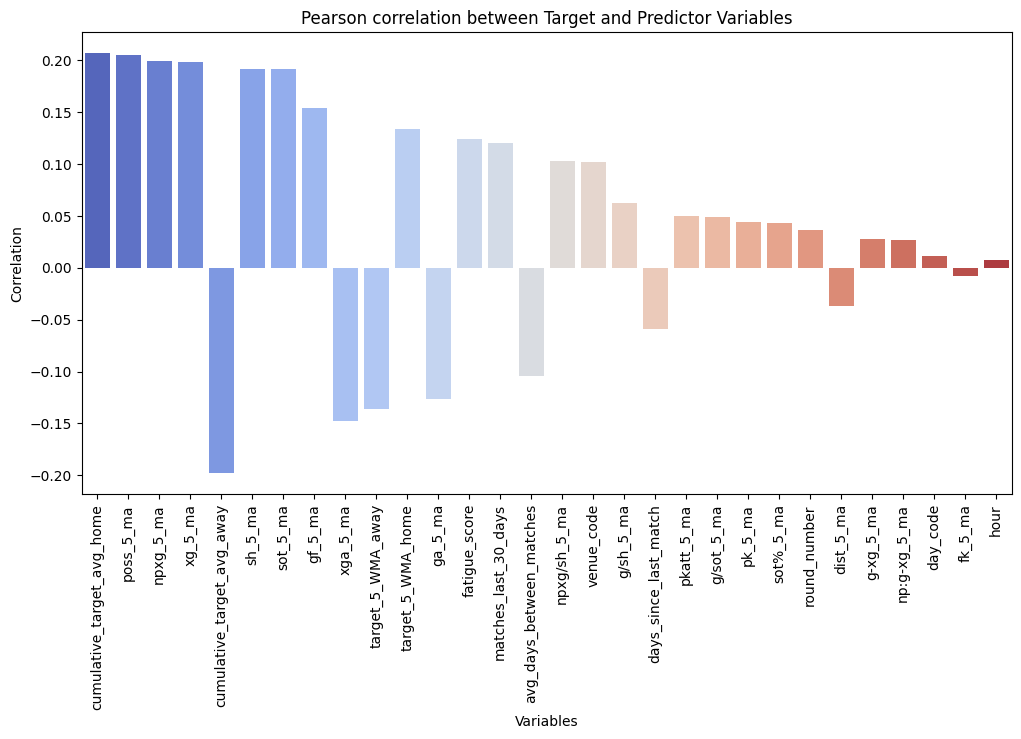

In [ ]:
# Calculate correlation matrix
correlation_matrix = data_train.corr()
# Select only correlations with 'target'
target_correlations = correlation_matrix['target'].drop('target')
target_correlations_sorted = target_correlations.reindex(target_correlations.abs().sort_values(ascending=False).index)

# Create a bar plot for the correlations with the target variable
plt.figure(figsize=(12, 6))
sns.barplot(x=target_correlations_sorted.index, y=target_correlations_sorted.values, hue=target_correlations_sorted.index, palette='coolwarm', legend=False)
plt.xticks(rotation=90)
plt.title(f'Pearson correlation between Target and Predictor Variables')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.show()

- **Spearman correlation** assesses the strength and direction of the monotonic relationship between two variables. Unlike Pearson, it can detect both linear and non-linear relationships as long as they are monotonic.

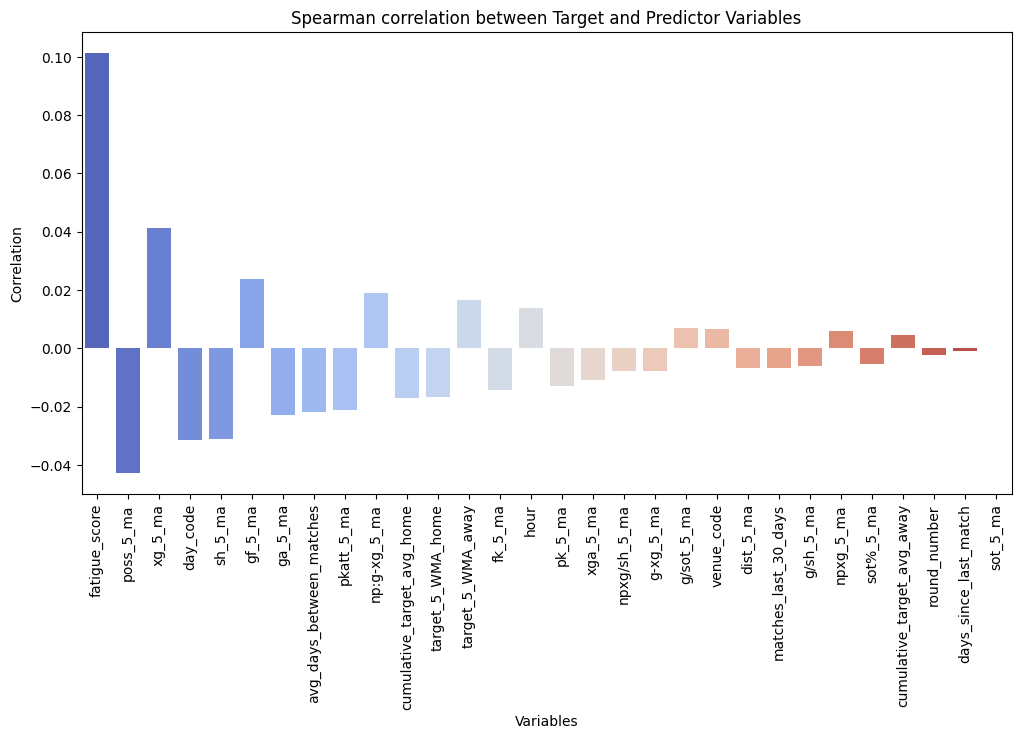

In [ ]:
from scipy.stats import spearmanr

corr_spearman, _ = spearmanr(X_train, y_train)
df_corr_spearman = pd.DataFrame(corr_spearman,
                                columns=['target'] + list(feature_names),
                                index=['target'] + list(feature_names)
                                )

# Select only correlations with 'target'
target_correlations = df_corr_spearman['target'].drop('target')
target_correlations_sorted = target_correlations.reindex(target_correlations.abs().sort_values(ascending=False).index)

# Create a bar plot for the correlations with the target variable
plt.figure(figsize=(12, 6))
sns.barplot(x=target_correlations_sorted.index, y=target_correlations_sorted.values, hue=target_correlations_sorted.index, palette='coolwarm', legend=False)
plt.xticks(rotation=90)
plt.title(f'Spearman correlation between Target and Predictor Variables')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.show()

- **Mutual information** is a measure from information theory that quantifies the amount of information gained about one random variable through the observation of another. It assesses the degree of dependency between two variables, regardless of the nature of their relationship (linear or non-linear).

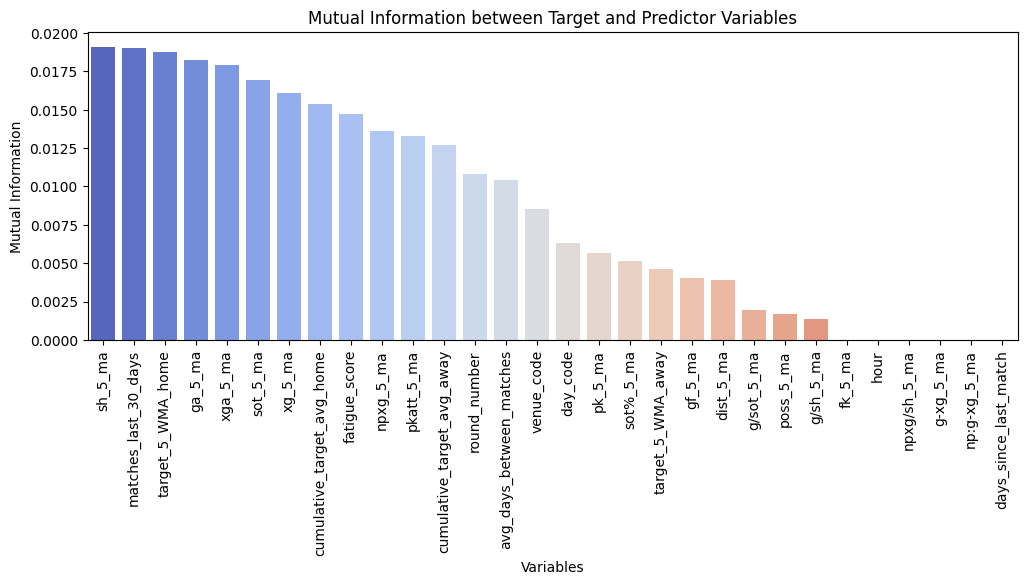

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Create mutual_info_classif object to calculate Mutual Information
MI_score = mutual_info_classif(X_train, y_train, random_state=0)

# Create dataframe for Mutual Information
mutual_information_df = []
for feature in zip(feature_names, MI_score):
    mutual_information_df.append(feature)

mutual_information_df = pd.DataFrame(mutual_information_df, columns=['feature_name', 'MI_score'])
mutual_information_df.sort_values('MI_score', ascending=False, inplace=True)

# Create a bar chart for visualizing the Mutual Information
plt.figure(figsize=(12,4))
sns.barplot(x=mutual_information_df['feature_name'], y=mutual_information_df['MI_score'], hue=mutual_information_df['feature_name'], palette='coolwarm', legend=False)
plt.xticks(rotation=90)
plt.title('Mutual Information between Target and Predictor Variables')
plt.xlabel('Variables')
plt.ylabel('Mutual Information')
plt.show()

# Creating machine learning model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline


# Train a simple Random Forest model to get feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Use SelectFromModel to select important features
selector = SelectFromModel(rf_model, threshold='mean', prefit=True)

# Get the selected feature indices
selected_features = selector.get_support(indices=True)
predictors = list(X_train.columns[selected_features])
print(f"Regressors: {len(selected_features)} {predictors}")

# Filter the dataset for selected features
X_selected = X_train[predictors]

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('classification', LogisticRegression())
])

# Perform 5-fold cross validation on the selected features
tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(pipeline, X_selected, y_train, cv=tscv, scoring='precision')
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation of Accuracy: {np.std(scores):.4f}")

Regressors: 18 ['round_number', 'cumulative_target_avg_home', 'avg_days_between_matches', 'xg_5_ma', 'xga_5_ma', 'poss_5_ma', 'sh_5_ma', 'sot_5_ma', 'sot%_5_ma', 'g/sh_5_ma', 'g/sot_5_ma', 'dist_5_ma', 'npxg_5_ma', 'npxg/sh_5_ma', 'g-xg_5_ma', 'np:g-xg_5_ma', 'cumulative_target_avg_away', 'fatigue_score']
Mean Accuracy: 0.5812
Standard Deviation of Accuracy: 0.0383


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [2, 5, 8],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 4]
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Use random search to find the best hyperparameters
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(rf,
                           param_grid=param_grid,
                           cv=tscv,
                           scoring='precision') # Precision= TP/(FP+TP​)

# Fit the random search object to the data
grid_search.fit(X_selected, y_train)

print("Best parameters:", grid_search.best_params_)
print(f"Mean Precision: {np.mean(grid_search.cv_results_['mean_test_score']):.4f}")
print(f"Standard Deviation of Precision: {np.std(grid_search.cv_results_['mean_test_score']):.4f}")

Best parameters: {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Mean Precision: 0.6213
Standard Deviation of Precision: 0.0279


In [ ]:
from sklearn.metrics import precision_score, accuracy_score

def make_predictions(test, predictors, model):
    """
    Makes predictions using a trained Random Forest classifier and calculates precision.

    Parameters:
    test (pd.DataFrame): The test dataset containing features and the actual target values.
    predictors (list): A list of column names to be used as features for making predictions.
    model (model): A trained classifier model.

    Returns:
    combined (pd.DataFrame): A DataFrame containing the actual target values and the predicted values,
                                  indexed by the original indices of the test dataset.
    precision (float): The precision score of the predictions, indicating the proportion of true positive
                       predictions among all positive predictions.
    """
    # Use the trained model to predict the target values for the test dataset based on the specified predictors
    preds = model.predict(test[predictors])
    probs = model.predict_proba(test[predictors])[:, 1]
    # Create a DataFrame combining the actual target values and the predicted values
    combined = pd.DataFrame(dict(actual=test['target'], predicted=preds, prob=probs), index=test.index)
    return combined


combined = make_predictions(data_test, predictors, grid_search.best_estimator_)

print(f"Precision: {precision_score(combined['actual'], combined['predicted']):.4f}")
print(f"Accuracy: {accuracy_score(combined['actual'], combined['predicted']):.4f}")

Precision: 0.7356
Accuracy: 0.6894


In [ ]:
metrics = {'probs' : [],
           'precisions' : [],
           'accuracies' : []
          }

for prob in np.arange(combined['prob'].min(), combined['prob'].max(), 0.01):
  metrics['probs'].append(prob)
  combined_prob = combined.loc[combined['prob']>prob, ['actual','predicted']].copy()
  # Caluclate score metrics
  precision = precision_score(combined_prob['actual'], combined_prob['predicted'])
  accuracy = accuracy_score(combined_prob['actual'], combined_prob['predicted'])
  metrics['precisions'].append(precision)
  metrics['accuracies'].append(accuracy)
  # Calculate % of data
  perc_data = len(combined_prob)/len(combined)*100

df_metrics = pd.DataFrame(metrics)
df_metrics.head()

,probs,precisions,accuracies
0,0.251761,0.735632,0.688797
1,0.261761,0.735632,0.686192
2,0.271761,0.735632,0.688559
3,0.281761,0.735632,0.686022
4,0.291761,0.735632,0.681319


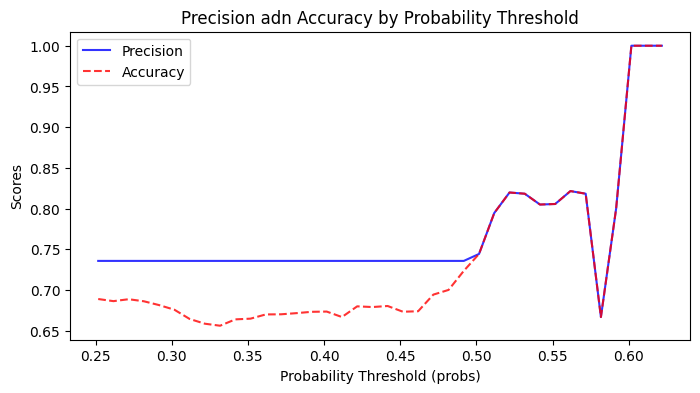

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(df_metrics['probs'], df_metrics['precisions'], label='Precision', color='blue', linestyle='-', alpha=0.8, linewidth=1.5)
plt.plot(df_metrics['probs'], df_metrics['accuracies'], label='Accuracy', color='red', linestyle='--', alpha=0.8, linewidth=1.5)
plt.xlabel('Probability Threshold (probs)')
plt.ylabel('Scores')
plt.legend(loc="upper left")

plt.title("Precision adn Accuracy by Probability Threshold")
plt.show()

In [ ]:
# Adding generic info on matches
df_test_results = combined.merge(df_features_selection.loc[n_split:, ['date','team','opponent']], left_index=True, right_index=True)

df_test_results.sort_values('date').head()

,actual,predicted,prob,date,team,opponent
1934,0,1,0.512057,2023-12-21,Brighton,Crystal Palace
1946,0,1,0.555985,2023-12-23,Newcastle Utd,Luton Town
1956,1,1,0.587988,2023-12-26,Liverpool,Burnley
1959,0,1,0.582179,2023-12-26,Newcastle Utd,Nott'ham Forest
1969,0,1,0.536763,2023-12-28,Tottenham,Brighton


In [ ]:
# Enhance precision by double-checking the prediction for each tested match
df_merged = df_test_results.merge(df_test_results, left_on=['date','team'], right_on=['date','opponent'], suffixes=('_home', '_away'))

print(df_merged.shape)
df_merged.head()

(458, 11)


,actual_home,predicted_home,prob_home,date,team_home,opponent_home,actual_away,predicted_away,prob_away,team_away,opponent_away
0,0,0,0.447943,2023-12-17,Liverpool,Manchester Utd,0,0,0.440970,Manchester Utd,Liverpool
1,0,0,0.440970,2023-12-17,Manchester Utd,Liverpool,0,0,0.447943,Liverpool,Manchester Utd
2,1,0,0.431154,2023-12-17,West Ham,Wolves,0,0,0.308594,Wolves,West Ham
3,0,0,0.308594,2023-12-17,Wolves,West Ham,1,0,0.431154,West Ham,Wolves
4,0,1,0.512057,2023-12-21,Brighton,Crystal Palace,0,0,0.309365,Crystal Palace,Brighton


In [ ]:
# Create a column that uniquely identifies each match, regardless of home/away order
df_merged['match_id'] = df_merged.apply(lambda row: '_'.join(sorted([row['team_home'], row['opponent_home'], str(row['date'])])), axis=1)
# Remove duplicates based on match_id, keeping only one row per game
df_cleaned = df_merged.drop_duplicates(subset='match_id').drop(columns='match_id')

print(df_cleaned.shape)
df_cleaned.head()

(229, 11)


,actual_home,predicted_home,prob_home,date,team_home,opponent_home,actual_away,predicted_away,prob_away,team_away,opponent_away
0,0,0,0.447943,2023-12-17,Liverpool,Manchester Utd,0,0,0.440970,Manchester Utd,Liverpool
2,1,0,0.431154,2023-12-17,West Ham,Wolves,0,0,0.308594,Wolves,West Ham
4,0,1,0.512057,2023-12-21,Brighton,Crystal Palace,0,0,0.309365,Crystal Palace,Brighton
6,0,0,0.486838,2023-12-22,Aston Villa,Sheffield Utd,0,0,0.251761,Sheffield Utd,Aston Villa
8,0,0,0.487593,2023-12-23,Arsenal,Liverpool,0,0,0.491358,Liverpool,Arsenal


In [ ]:
check_precision = df_cleaned[(df_cleaned['predicted_home'] == 1) & (df_cleaned['predicted_away'] == 0)]['actual_home'].value_counts()

check_precision

,count
actual_home,
1,34
0,9


In [ ]:
print(f"New precision score: {check_precision.iloc[0]/check_precision.sum():.4f}")
print(f"Percentage of matches: {check_precision.sum()/len(df_cleaned)*100:.2f}%")

New precision score: 0.7907
Percentage of matches: 18.78%
